In [1]:
# HPC
import netCDF4 as nc
import numpy as np
import xarray as xr

# Plotting
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import FormatStrFormatter

# Paths and stuff
import os
import sys

# Append to sys.path the absolute path to src/pySICOPOLIS
path_list = os.path.abspath('').split('/')
path_src_pySICOPOLIS = ''
for link in path_list[:-1]:
    path_src_pySICOPOLIS = path_src_pySICOPOLIS+link+'/'
sys.path.append(path_src_pySICOPOLIS+'/src')

# Now import module pySICOPOLIS
from pySICOPOLIS import *

In [2]:
### Load data

dataPath = '/scratch2/shreyas/GrIS_paleo_data/'
ds_temp = xr.open_dataset(dataPath + 'RDBTS4_Greenland_1993_2017_02_basal_thermal_state.nc')
ds_vel  = xr.open_dataset(dataPath + 'RDGBV4_Greenland_1993_2013_01_balance_velocity_9ka.nc')
ds_bm5  = xr.open_dataset(dataPath + 'BedMachineGreenland-v5.nc')

ds_age  = xr.open_dataset(dataPath + 'RRRAG4_Greenland_1993_2013_01_age_grid.nc')
ds_age_correct = ageData.correctAgeDataset(ds_age,
                            path = dataPath,
                            filename = 'RRRAG4_Greenland_1993_2013_01_age_grid_corrected.nc',
                            zetaLevels = 26,
                            unCorrupt = False)

# Convert metres to kms
ds_bm5['x'] = ds_bm5['x']*0.001
ds_bm5['y'] = ds_bm5['y']*0.001
ds_temp['x'] = ds_temp['x']*0.001
ds_temp['y'] = ds_temp['y']*0.001

### Load model outputs

modelPath = '/scratch2/shreyas/GrIS_paleo_sim_output/'

ds_model = xr.open_dataset(modelPath + 'grl10_bm5_paleo17a/grl10_bm5_paleo17a0010.nc')
ds_model10 = modelData.correctModelDataset(ds_model)
ds_ser10 = xr.open_dataset(modelPath + 'grl10_bm5_paleo17a/grl10_bm5_paleo17a_ser.nc')
ds_core10 = xr.open_dataset(modelPath + 'grl10_bm5_paleo17a/grl10_bm5_paleo17a_core.nc')

ds_model = xr.open_dataset(modelPath + 'grl10_bm5_paleo17a_BH0/grl10_bm5_paleo17a_BH00010.nc')
ds_model10_BH0 = modelData.correctModelDataset(ds_model)
ds_ser10_BH0 = xr.open_dataset(modelPath + 'grl10_bm5_paleo17a_BH0/grl10_bm5_paleo17a_BH0_ser.nc')
ds_core10_BH0 = xr.open_dataset(modelPath + 'grl10_bm5_paleo17a_BH0/grl10_bm5_paleo17a_BH0_core.nc')

ds_model = xr.open_dataset(modelPath + 'grl40_bm5_paleo17a/grl40_bm5_paleo17a0010.nc')
ds_model40 = modelData.correctModelDataset(ds_model)
ds_ser40 = xr.open_dataset(modelPath + 'grl40_bm5_paleo17a/grl40_bm5_paleo17a_ser.nc')
ds_core40 = xr.open_dataset(modelPath + 'grl40_bm5_paleo17a/grl40_bm5_paleo17a_core.nc')

ds_model = xr.open_dataset(modelPath + 'grl40_bm5_paleo17a_BH0/grl40_bm5_paleo17a_BH00010.nc')
ds_model40_BH0 = modelData.correctModelDataset(ds_model)
ds_ser40_BH0 = xr.open_dataset(modelPath + 'grl40_bm5_paleo17a_BH0/grl40_bm5_paleo17a_BH0_ser.nc')
ds_core40_BH0 = xr.open_dataset(modelPath + 'grl40_bm5_paleo17a_BH0/grl40_bm5_paleo17a_BH0_core.nc')

In [3]:
xModel10       = np.arange(-72.,97.,1.0)*10
yModel10       = np.arange(-345.,-56.,1.0)*10
ds_bm5_10kms = ageData.interpToModelGrid2D(ds = ds_bm5,
                                           xModel = xModel10,
                                           yModel = yModel10,
                                           hor_interp_method = 'nearest',
                                           replace_nans_with = -999.0,
                                           path = dataPath,
                                           filename = 'bm5_data_10kms.nc')

xModel40       = np.arange(-72.,97.,4.0)*10
yModel40       = np.arange(-345.,-56.,4.0)*10
ds_bm5_40kms = ageData.interpToModelGrid2D(ds = ds_bm5,
                                           xModel = xModel40,
                                           yModel = yModel40,
                                           hor_interp_method = 'nearest',
                                           replace_nans_with = -999.0,
                                           path = dataPath,
                                           filename = 'bm5_data_40kms.nc')

xModel16       = np.arange(-72.,97.,1.6)*10
yModel16       = np.arange(-345.,-56.,1.6)*10
ds_bm5_16kms = ageData.interpToModelGrid2D(ds = ds_bm5,
                                           xModel = xModel16,
                                           yModel = yModel16,
                                           hor_interp_method = 'nearest',
                                           replace_nans_with = -999.0,
                                           path = dataPath,
                                           filename = 'bm5_data_16kms.nc')

In [4]:
ds_bm5_40kms

<xarray.Dataset> Size: 203kB
Dimensions:    (yModel: 73, xModel: 43, jModel: 73, iModel: 43)
Coordinates:
  * xModel     (xModel) float64 344B -720.0 -680.0 -640.0 ... 880.0 920.0 960.0
  * yModel     (yModel) float64 584B -3.45e+03 -3.41e+03 ... -610.0 -570.0
  * jModel     (jModel) int64 584B 0 1 2 3 4 5 6 7 8 ... 65 66 67 68 69 70 71 72
  * iModel     (iModel) int64 344B 0 1 2 3 4 5 6 7 8 ... 35 36 37 38 39 40 41 42
Data variables:
    mapping    object 8B b''
    mask       (yModel, xModel) float64 25kB -999.0 -999.0 ... -999.0 -999.0
    surface    (yModel, xModel) float32 13kB -999.0 -999.0 ... -999.0 -999.0
    thickness  (yModel, xModel) float32 13kB -999.0 -999.0 ... -999.0 -999.0
    bed        (yModel, xModel) float32 13kB -999.0 -999.0 ... -999.0 -999.0
    errbed     (yModel, xModel) float32 13kB -999.0 -999.0 ... -999.0 -999.0
    source     (yModel, xModel) float64 25kB -999.0 -999.0 ... -999.0 -999.0
    dataid     (yModel, xModel) float64 25kB -999.0 -999.0 ... -999.0 -999.0
    geoid      (yModel, xModel) float64 25kB -999.0 -999.0 ... -999.0 -999.0
    xMesh      (jModel, iModel) float64 25kB -720.0 -680.0 ... 920.0 960.0
    yMesh      (jModel, iModel) float64 25kB -3.45e+03 -3.45e+03 ... -570.0
Attributes: (12/16)
    Conventions:                 CF-1.7
    Title:                       BedMachine Greenland
    Author:                      Mathieu Morlighem
    version:                     28-Jul-2022 (v5.5)
    nx:                          10218.0
    ny:                          18346.0
    ...                          ...
    xmin:                        -652925
    ymax:                        -632675
    spacing:                     150
    no_data:                     -9999.0
    license:                     No restrictions on access or use
    Data_citation:               Morlighem M. et al., (2017), BedMachine v3: ...

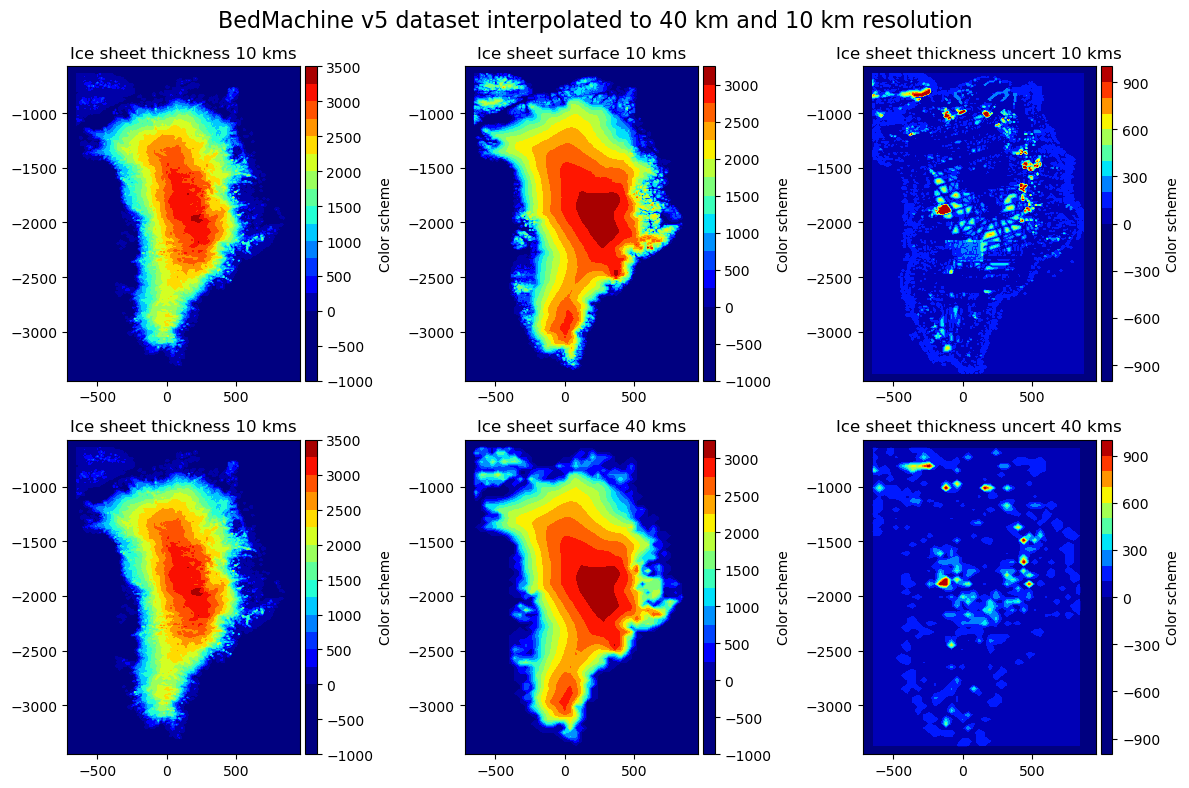

In [5]:
plt.rcParams["figure.figsize"] = (12,8)
fig, ax = plt.subplots(2,3)

fancyPlotter.plot_normal(ds_bm5_10kms['xModel'], ds_bm5_10kms['yModel'], 
                         ds_bm5_10kms['thickness'],
                         cmap = 'jet', vmin = 0, nbins = 20, fig = fig, ax = ax[0,0])
ax[0,0].set_title('Ice sheet thickness 10 kms')

fancyPlotter.plot_normal(ds_bm5_10kms['xModel'], ds_bm5_10kms['yModel'], 
                         ds_bm5_10kms['surface'],
                         cmap = 'jet', vmin = 0, nbins = 20, fig = fig, ax = ax[0,1])
ax[0,1].set_title('Ice sheet surface 10 kms')

fancyPlotter.plot_normal(ds_bm5_10kms['xModel'], ds_bm5_10kms['yModel'], 
                         ds_bm5_10kms['errbed'],
                         cmap = 'jet', vmin = 0, nbins = 20, fig = fig, ax = ax[0,2])
ax[0,2].set_title('Ice sheet thickness uncert 10 kms')

fancyPlotter.plot_normal(ds_bm5_10kms['xModel'], ds_bm5_10kms['yModel'], 
                         ds_bm5_10kms['thickness'],
                         cmap = 'jet', vmin = 0, nbins = 20, fig = fig, ax = ax[1,0])
ax[1,0].set_title('Ice sheet thickness 10 kms')

fancyPlotter.plot_normal(ds_bm5_40kms['xModel'], ds_bm5_40kms['yModel'], 
                         ds_bm5_40kms['surface'],
                         cmap = 'jet', vmin = 0, nbins = 20, fig = fig, ax = ax[1,1])
ax[1,1].set_title('Ice sheet surface 40 kms')

fancyPlotter.plot_normal(ds_bm5_40kms['xModel'], ds_bm5_40kms['yModel'], 
                         ds_bm5_40kms['errbed'],
                         cmap = 'jet', vmin = 0, nbins = 20, fig = fig, ax = ax[1,2])
ax[1,2].set_title('Ice sheet thickness uncert 40 kms')

fig.suptitle('BedMachine v5 dataset interpolated to 40 km and 10 km resolution', fontsize = 16)
plt.tight_layout()

In [6]:
ds_model10['age_c']

<xarray.DataArray 'age_c' (zeta_c: 81, yModel: 289, xModel: 169)> Size: 16MB
[3956121 values with dtype=float32]
Coordinates:
  * xModel   (xModel) float64 1kB -7.2e+05 -7.1e+05 -7e+05 ... 9.5e+05 9.6e+05
  * yModel   (yModel) float64 2kB -3.45e+06 -3.44e+06 ... -5.8e+05 -5.7e+05
Dimensions without coordinates: zeta_c
Attributes:
    units:          a
    standard_name:  land_ice_kc_layer_age
    long_name:      Age in the upper (kc) ice layer
    grid_mapping:   mapping

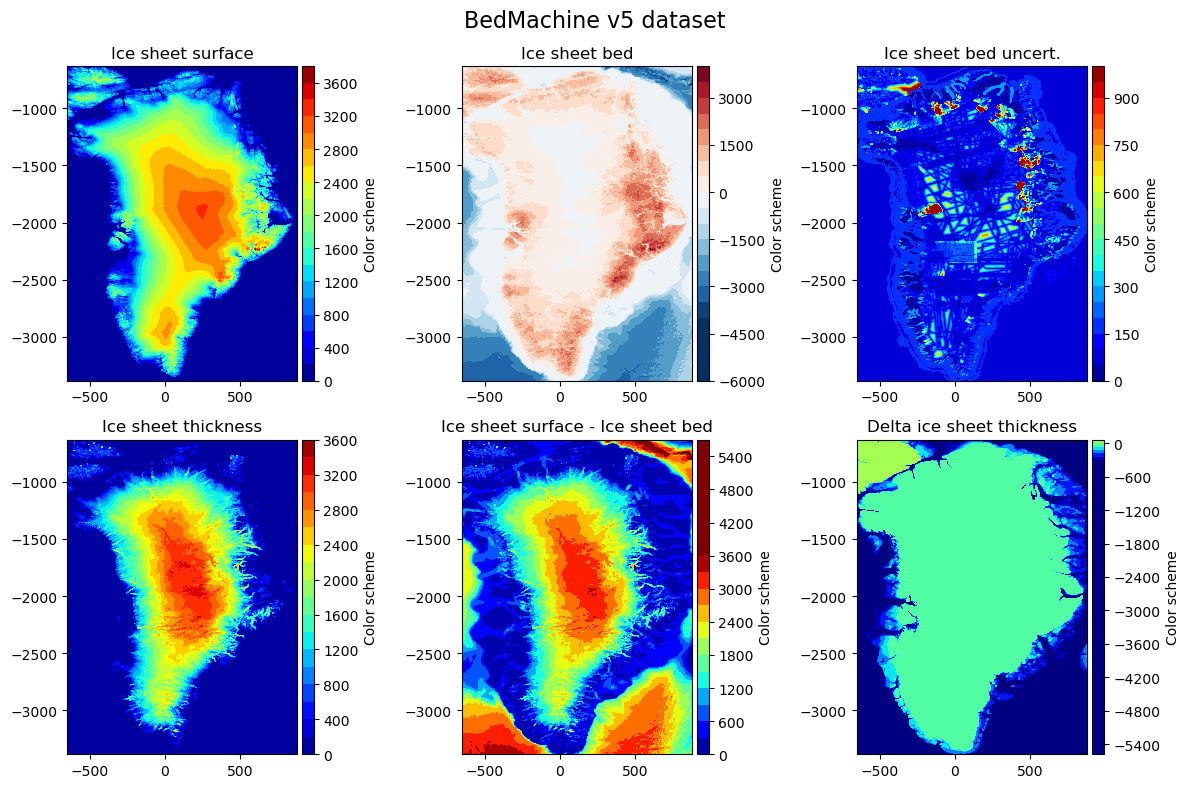

In [7]:
plt.rcParams["figure.figsize"] = (12,8)
fig, ax = plt.subplots(2,3)

fancyPlotter.plot_normal(ds_bm5['x'], ds_bm5['y'], 
                         ds_bm5['surface'],
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[0,0])
ax[0,0].set_title('Ice sheet surface')

fancyPlotter.plot_normal(ds_bm5['x'], ds_bm5['y'], 
                         ds_bm5['bed'],
                         cmap = 'RdBu_r', nbins = 20, fig = fig, ax = ax[0,1],
                         vmin = -4000, vmax = 4000)
ax[0,1].set_title('Ice sheet bed')

fancyPlotter.plot_normal(ds_bm5['x'], ds_bm5['y'], 
                         ds_bm5['errbed'],
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[0,2])
ax[0,2].set_title('Ice sheet bed uncert.')

fancyPlotter.plot_normal(ds_bm5['x'], ds_bm5['y'], 
                         ds_bm5['thickness'],
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[1,0])
ax[1,0].set_title('Ice sheet thickness')

fancyPlotter.plot_normal(ds_bm5['x'], ds_bm5['y'], 
                         ds_bm5['surface']-ds_bm5['bed'],
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[1,1],
                         vmax = 3600)
ax[1,1].set_title('Ice sheet surface - Ice sheet bed')

fancyPlotter.plot_normal(ds_bm5['x'], ds_bm5['y'], 
                         ds_bm5['thickness']-(ds_bm5['surface']-ds_bm5['bed']),
                         cmap = 'jet', nbins = 100, fig = fig, ax = ax[1,2],
                         vmin = -300, vmax = 300)
ax[1,2].set_title('Delta ice sheet thickness')

fig.suptitle('BedMachine v5 dataset', fontsize = 16)
plt.tight_layout()

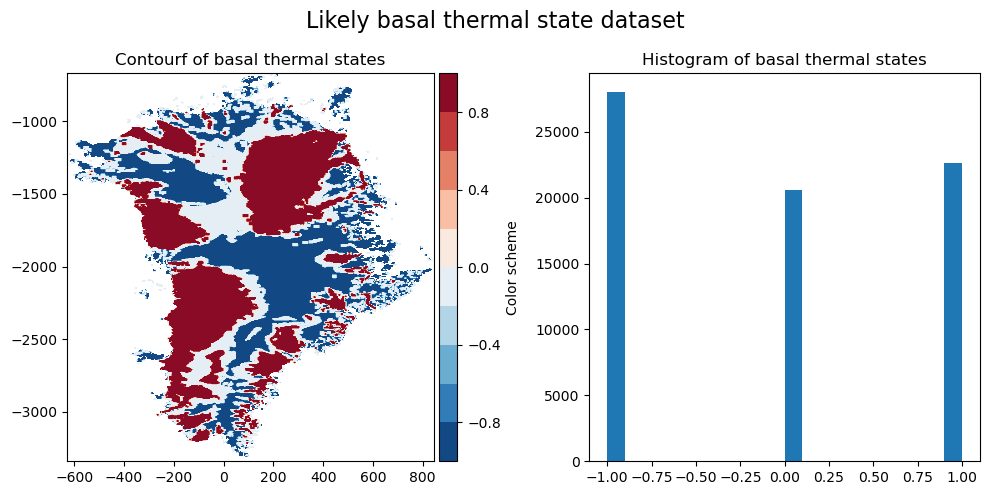

In [8]:
plt.rcParams["figure.figsize"] = (10,5)
fig, ax = plt.subplots(1,2)

fancyPlotter.plot_normal(ds_temp['x'], ds_temp['y'], 
                         ds_temp['likely_basal_thermal_state'],
                         cmap = 'RdBu_r', nbins = 10, fig = fig, ax = ax[0])
ax[0].set_title('Contourf of basal thermal states')


ax[1].hist(ds_temp['likely_basal_thermal_state'].to_numpy().flatten(), 
           bins = 20)
ax[1].set_title('Histogram of basal thermal states')
fig.suptitle('Likely basal thermal state dataset', fontsize = 16)

plt.tight_layout()

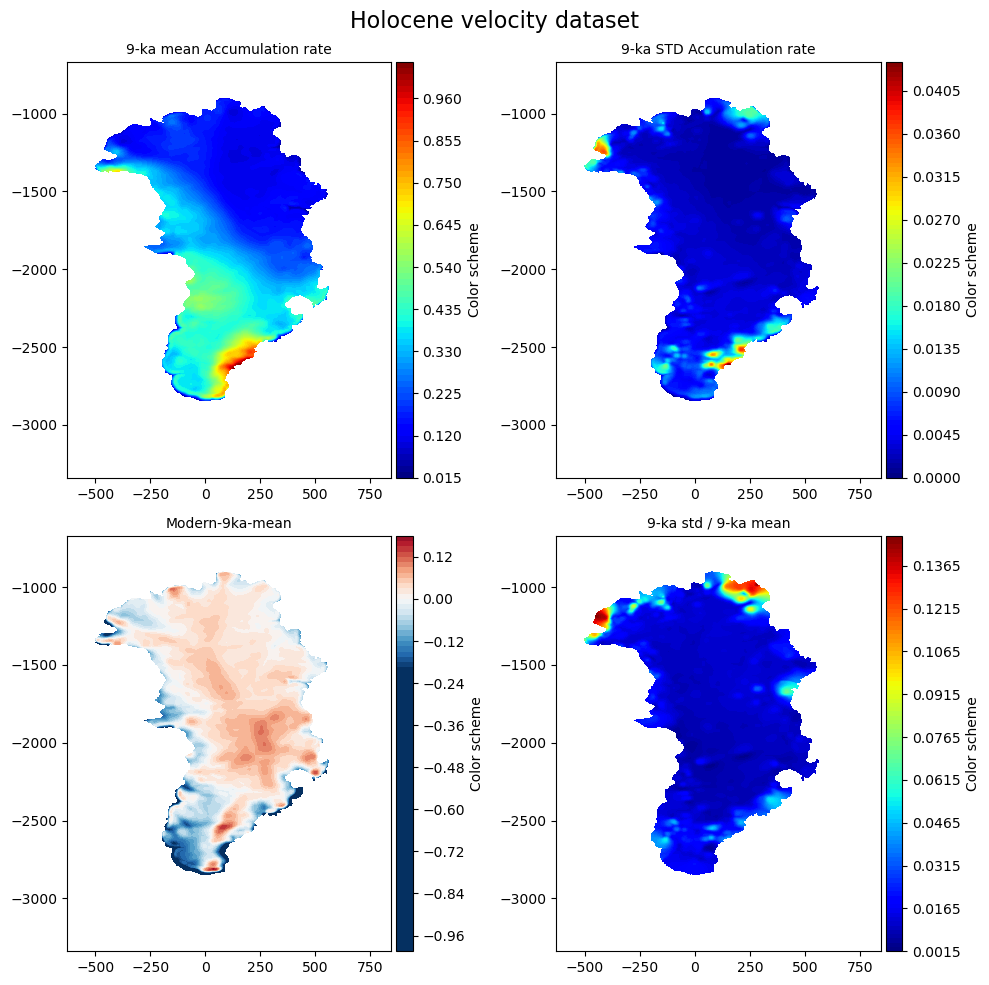

In [9]:
plt.rcParams["figure.figsize"] = (10,10)
fig, ax = plt.subplots(2,2)

fancyPlotter.plot_normal(ds_temp['x'], ds_temp['y'], 
                         ds_vel['accumulation_rate'][0][:,::-1].T,
                         cmap = 'jet', nbins = 100, fig = fig, ax = ax[0,0])

ax[0,0].set_title('9-ka mean Accumulation rate', fontsize=10)

### 1 sigma STD
STD = 0.25*(ds_vel['accumulation_rate'][2]-ds_vel['accumulation_rate'][1])
fancyPlotter.plot_normal(ds_temp['x'], ds_temp['y'], 
                         STD[:,::-1].T,
                         cmap = 'jet', nbins = 100, fig = fig, ax = ax[0,1])

ax[0,1].set_title('9-ka STD Accumulation rate', fontsize=10)

fancyPlotter.plot_normal(ds_temp['x'], ds_temp['y'], 
                         ds_vel['accumulation_rate_difference'][0][:,::-1].T,
                         cmap = 'RdBu_r', nbins = 100, fig = fig, ax = ax[1,0], vmin = -0.2, vmax = 0.2)

ax[1,0].set_title('Modern-9ka-mean', fontsize=10)

fancyPlotter.plot_normal(ds_temp['x'], ds_temp['y'], 
                         STD[:,::-1].T/ds_vel['accumulation_rate'][0][:,::-1].T,
                         cmap = 'jet', nbins = 100, fig = fig, ax = ax[1,1])

ax[1,1].set_title('9-ka std / 9-ka mean', fontsize=10)

fig.suptitle('Holocene velocity dataset', fontsize = 16)
plt.tight_layout()

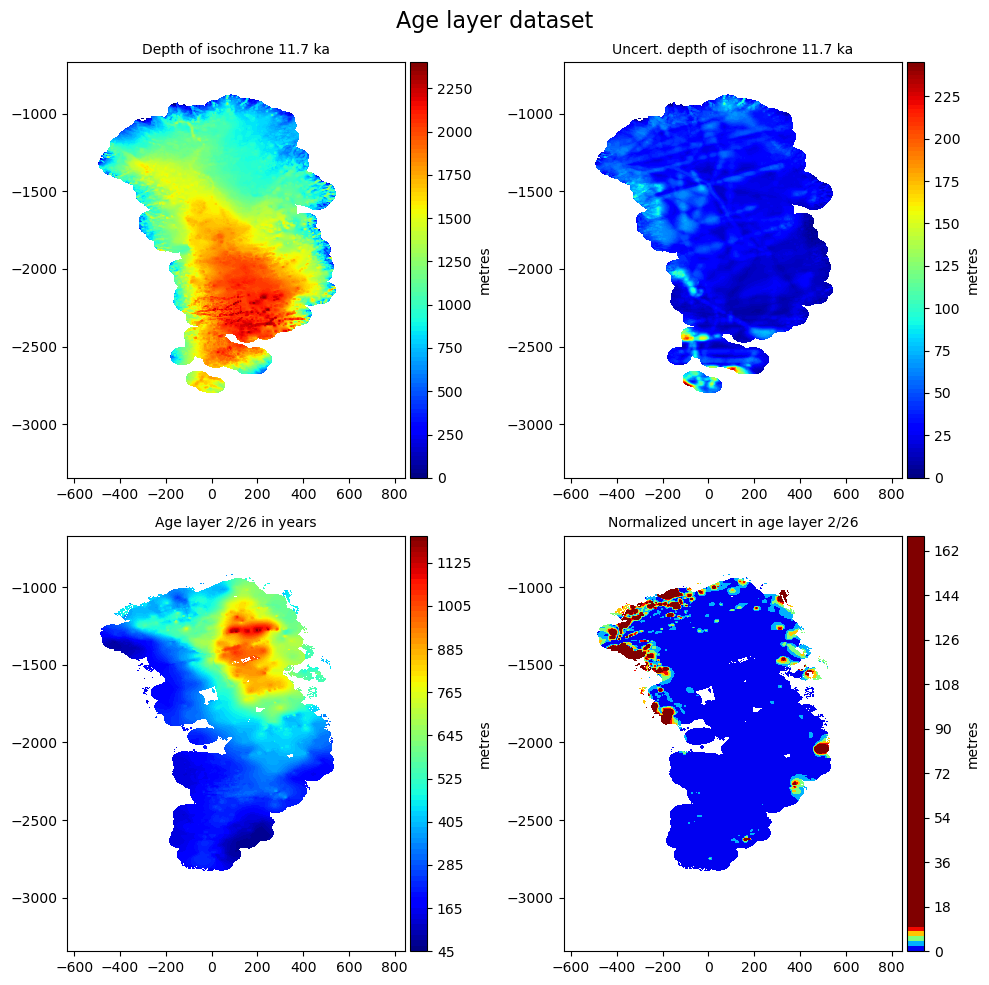

In [10]:
plt.rcParams["figure.figsize"] = (10,10)
fig, ax = plt.subplots(2,2)
age_isochrones = ds_age['age_iso'].data

fancyPlotter.plot_normal(ds_age['x'], ds_age['y'], 
                         ds_age['depth_iso'][0],
                         cmap = 'jet', nbins = 100, 
                         fig = fig, ax = ax[0,0],
                         cbar_label = 'metres')

ax[0,0].set_title(f'Depth of isochrone {age_isochrones[0]/1000} ka', fontsize=10)

fancyPlotter.plot_normal(ds_age['x'], ds_age['y'], 
                         ds_age['depth_iso_uncert'][0],
                         cmap = 'jet', nbins = 100, 
                         fig = fig, ax = ax[0,1],
                         cbar_label = 'metres')

ax[0,1].set_title(f'Uncert. depth of isochrone {age_isochrones[0]/1000} ka', fontsize=10)

fancyPlotter.plot_normal(ds_age['x'], ds_age['y'], 
                         ds_age['age_norm'][0],
                         cmap = 'jet', nbins = 100, 
                         fig = fig, ax = ax[1,0],
                         cbar_label = 'metres')

### Age layer 1/26 is just age 0
ax[1,0].set_title(f'Age layer 2/26 in years', fontsize=10)

fancyPlotter.plot_normal(ds_age['x'], ds_age['y'], 
                         ds_age['age_norm_uncert'][0]/ds_age['age_norm'][0],
                         cmap = 'jet', nbins = 100, 
                         fig = fig, ax = ax[1,1],
                         cbar_label = 'metres', vmax = 10)

### Age layer 1/26 is just age 0
ax[1,1].set_title(f'Normalized uncert in age layer 2/26', fontsize=10)

fig.suptitle('Age layer dataset', fontsize = 16)
plt.tight_layout()

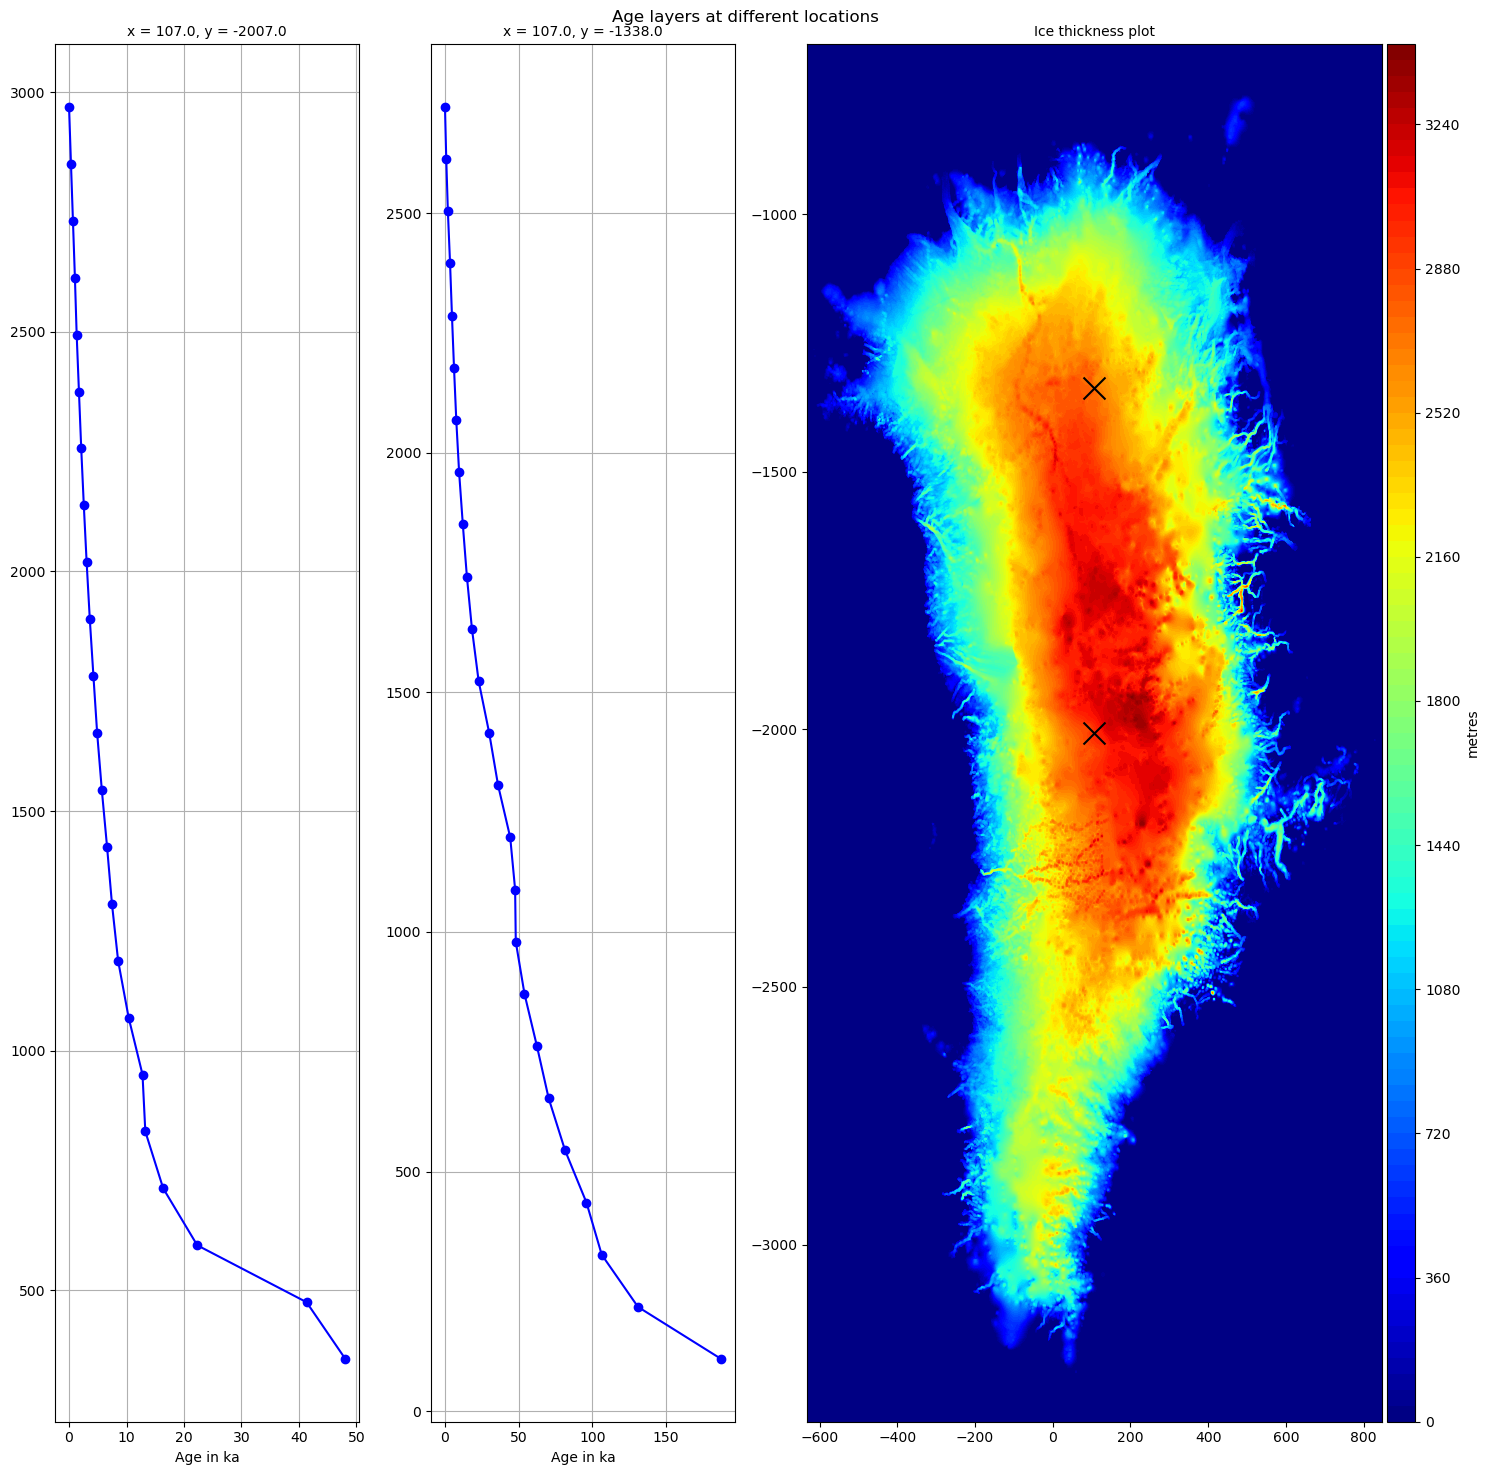

In [11]:
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots(1,3, width_ratios=[1,1,2])

xIndex = int(ds_age_correct['xData'].shape[0]/2)
yIndex = int(ds_age_correct['yData'].shape[0]/2)

xLoc = ds_age_correct['xData'][xIndex].data
yLoc = ds_age_correct['yData'][yIndex].data
age_z = ds_age_correct['age'][:,yIndex,xIndex]
depth_z = ds_age_correct['z_minus_zbData'][:,yIndex,xIndex]

fancyPlotter.plot_normal(ds_age_correct['xData'], ds_age_correct['yData'], 
                         ds_age_correct['thick'],
                         cmap = 'jet', nbins = 100, 
                         fig = fig, ax = ax[2],
                         cbar_label = 'metres')
ax[2].set_title(f'Ice thickness plot', fontsize=10)

fancyPlotter.plot_1D_depth_profile(age_z/1000, depth_z, None,
                                   fig=fig, ax = ax[0], 
                                   linestyle='-', marker='o', color='b')
ax[0].set_title(f'x = {xLoc}, y = {yLoc}', fontsize=10)
ax[0].set_xlabel(f'Age in ka', fontsize=10)
ax[2].scatter(xLoc, yLoc, s=250, c='black', marker='x')

xIndex = int(ds_age_correct['xData'].shape[0]/2)
yIndex = int(3*ds_age_correct['yData'].shape[0]/4)

xLoc = ds_age_correct['xData'][xIndex].data
yLoc = ds_age_correct['yData'][yIndex].data
age_z = ds_age_correct['age'][:,yIndex,xIndex]
depth_z = ds_age_correct['z_minus_zbData'][:,yIndex,xIndex]

fancyPlotter.plot_1D_depth_profile(age_z/1000, depth_z, None,
                                   fig=fig, ax = ax[1], 
                                   linestyle='-', marker='o', color='b')
ax[1].set_title(f'x = {xLoc}, y = {yLoc}', fontsize=10)
ax[1].set_xlabel(f'Age in ka', fontsize=10)
ax[2].scatter(xLoc, yLoc, s=250, c='black', marker='x')

fig.suptitle(f'Age layers at different locations')
plt.tight_layout()

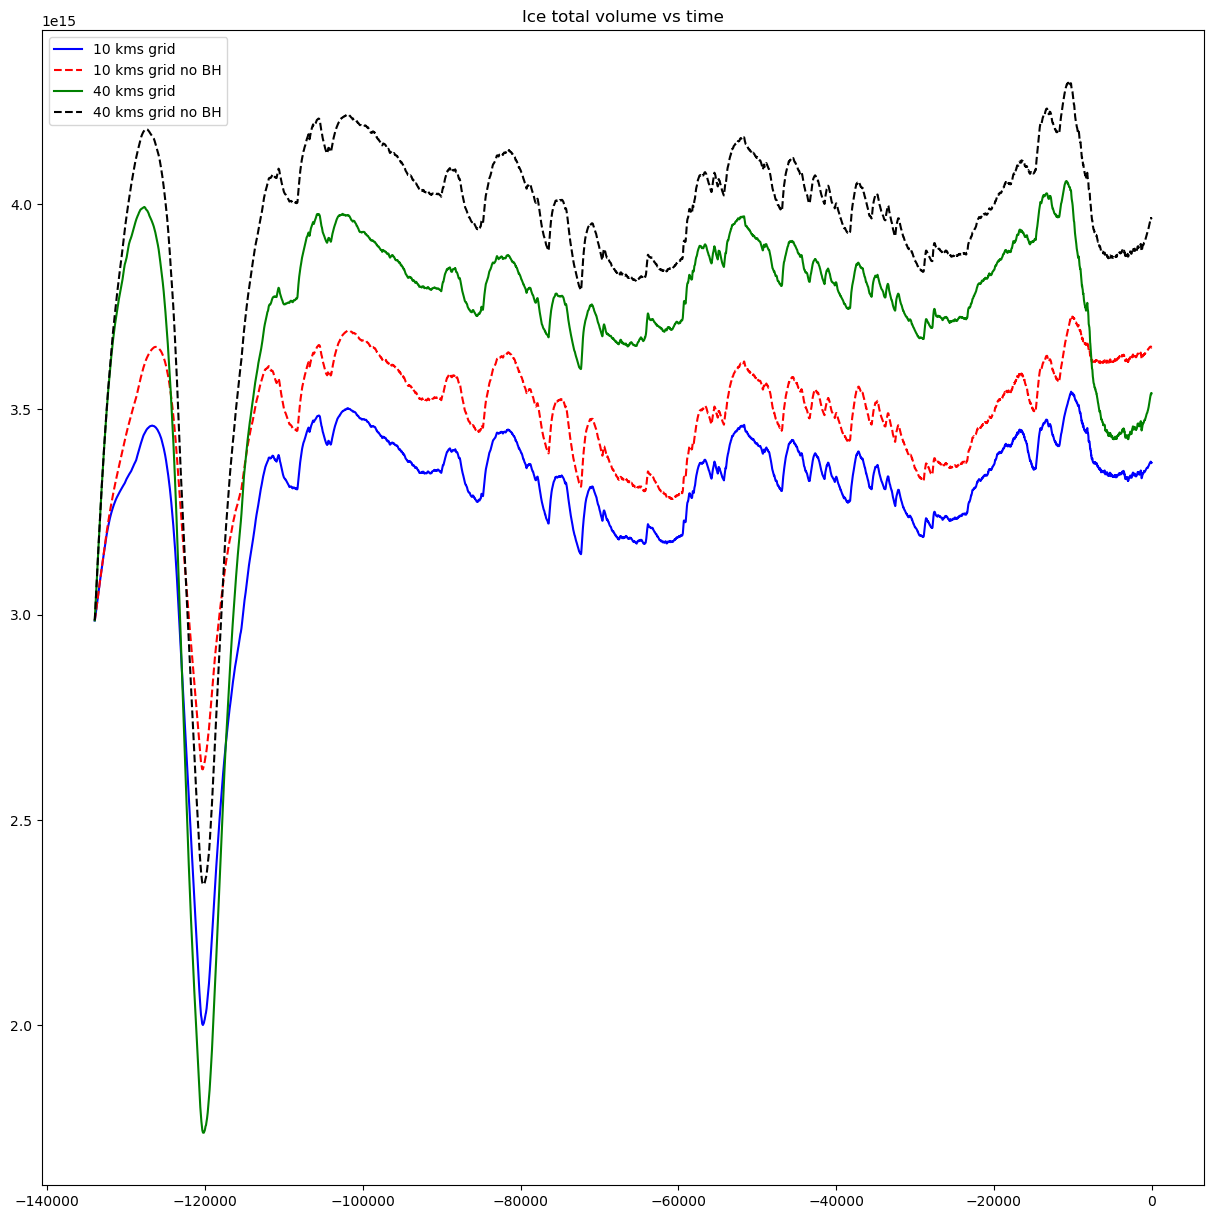

In [12]:
plt.plot(ds_ser10['t'], ds_ser10['V_tot'], 'b', label = '10 kms grid')
plt.plot(ds_ser10_BH0['t'], ds_ser10_BH0['V_tot'], 'r--', label = '10 kms grid no BH')

plt.plot(ds_ser40['t'], ds_ser40['V_tot'], 'g', label = '40 kms grid')
plt.plot(ds_ser40_BH0['t'], ds_ser40_BH0['V_tot'], 'k--', label = '40 kms grid no BH')

plt.title("Ice total volume vs time")
plt.legend()

In [13]:
exp_sigma_level  = dataCleaner.exp_sigma_level(zeta = np.arange(0,1+1./80,1./80),
                                               exponent = 2.0)

xModel10       = np.arange(-72.,97.,1.0)*10
yModel10       = np.arange(-345.,-56.,1.0)*10
ds_age_10kms = ageData.interpToModelGrid(ds_age_correct = ds_age_correct,
                                         xModel = xModel10,
                                         yModel = yModel10,
                                         sigma_levelModel = exp_sigma_level,
                                         hor_interp_method = 'nearest',
                                         ver_interp_method = 'linear',
                                         replace_nans_with = -999.0,
                                         path = dataPath,
                                         filename = 'age_data_10kms.nc',
                                         sigma = 2.0, truncate = 4)

xModel40       = np.arange(-72.,97.,4.0)*10
yModel40       = np.arange(-345.,-56.,4.0)*10
ds_age_40kms = ageData.interpToModelGrid(ds_age_correct = ds_age_correct,
                                         xModel = xModel40,
                                         yModel = yModel40,
                                         sigma_levelModel = exp_sigma_level,
                                         hor_interp_method = 'nearest',
                                         ver_interp_method = 'linear',
                                         replace_nans_with = -999.0,
                                         path = dataPath,
                                         filename = 'age_data_40kms.nc',
                                         sigma = 1.0, truncate = 4)

xModel16       = np.arange(-72.,97.,1.6)*10
yModel16       = np.arange(-345.,-56.,1.6)*10
ds_age_40kms = ageData.interpToModelGrid(ds_age_correct = ds_age_correct,
                                         xModel = xModel16,
                                         yModel = yModel16,
                                         sigma_levelModel = exp_sigma_level,
                                         hor_interp_method = 'nearest',
                                         ver_interp_method = 'linear',
                                         replace_nans_with = -999.0,
                                         path = dataPath,
                                         filename = 'age_data_16kms.nc',
                                         sigma = 2.0, truncate = 4)

/home/shreyas/pySICOPOLIS//src/pySICOPOLIS/utils/data/dataCleaner.py:89: RuntimeWarning: invalid value encountered in divide
  smooth_field = VV/WW
/home/shreyas/pySICOPOLIS//src/pySICOPOLIS/utils/data/dataCleaner.py:89: RuntimeWarning: invalid value encountered in divide
  smooth_field = VV/WW
/home/shreyas/pySICOPOLIS//src/pySICOPOLIS/utils/data/dataCleaner.py:89: RuntimeWarning: invalid value encountered in divide
  smooth_field = VV/WW


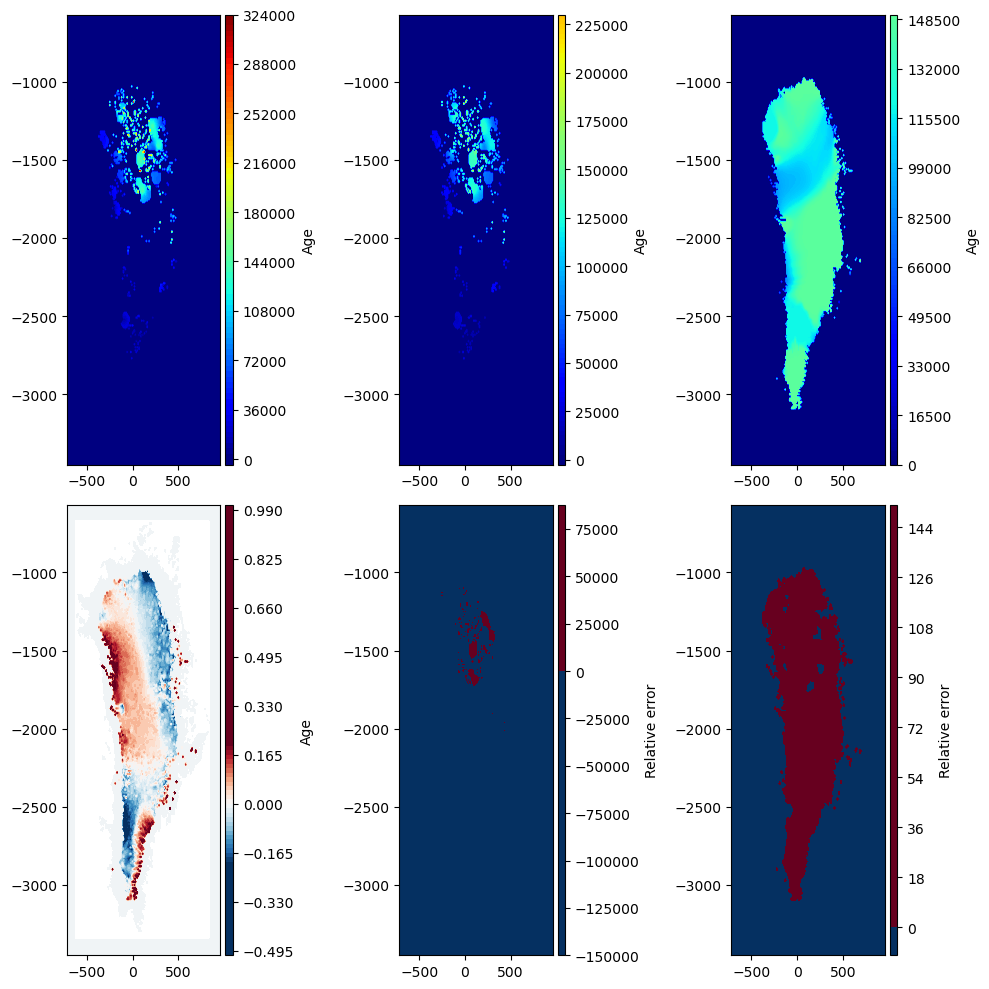

In [14]:
idz = 0

plt.rcParams["figure.figsize"] = (10,10)
fig, ax = plt.subplots(2,3)

fancyPlotter.plot_normal(ds_age_10kms['xModel'],
                         ds_age_10kms['yModel'], 
                         ds_age_10kms['age'][idz]*(ds_age_10kms['thick'].data>1500),
                         cmap = 'jet', nbins = 100, 
                         fig = fig, ax = ax[0,0], vmin = 0, vmax = np.max(ds_age_10kms['age'][idz]),
                         cbar_label = 'Age')

fancyPlotter.plot_normal(ds_age_10kms['xModel'],
                         ds_age_10kms['yModel'], 
                         ds_age_10kms['age_smooth2D'][idz]*(ds_age_10kms['thick'].data>1500),
                         cmap = 'jet', nbins = 100, 
                         fig = fig, ax = ax[0,1], vmin = 0, vmax = np.max(ds_age_10kms['age'][idz]),
                         cbar_label = 'Age')

fancyPlotter.plot_normal(ds_age_10kms['xModel'],
                         ds_age_10kms['yModel'], 
                         ds_model10['age_c'][idz].data*(ds_age_10kms['thick'].data>1500),
                         cmap = 'jet', nbins = 100, 
                         fig = fig, ax = ax[0,2], vmin = 0, vmax = np.max(ds_age_10kms['age'][idz]),
                         cbar_label = 'Age')

fancyPlotter.plot_normal(ds_age_10kms['xModel'],
                         ds_age_10kms['yModel'], 
                         (1-ds_model10['H']/ds_age_10kms['thick'].data)*(ds_age_10kms['thick'].data>1500),
                         cmap = 'RdBu_r', nbins = 100, 
                         fig = fig, ax = ax[1,0], vmin = -0.2, vmax = 0.2,
                         cbar_label = 'Age')

fancyPlotter.plot_normal(ds_age_10kms['xModel'],
                         ds_age_10kms['yModel'], 
                         (ds_age_10kms['age_smooth2D'][idz]-ds_model10['age_c'][idz].data)*(ds_age_10kms['thick'].data>1500),
                         cmap = 'RdBu_r', nbins = 100, 
                         fig = fig, ax = ax[1,1], vmin = -1000, vmax = 1000,
                         cbar_label = 'Relative error')

fancyPlotter.plot_normal(ds_age_10kms['xModel'],
                         ds_age_10kms['yModel'], 
                         (1-ds_model10['age_c'][idz].data/ds_age_10kms['age_smooth2D'][idz])*(ds_age_10kms['thick'].data>1500),
                         cmap = 'RdBu_r', nbins = 100, 
                         fig = fig, ax = ax[1,2], vmin = -1, vmax = 1,
                         cbar_label = 'Relative error')
plt.tight_layout()

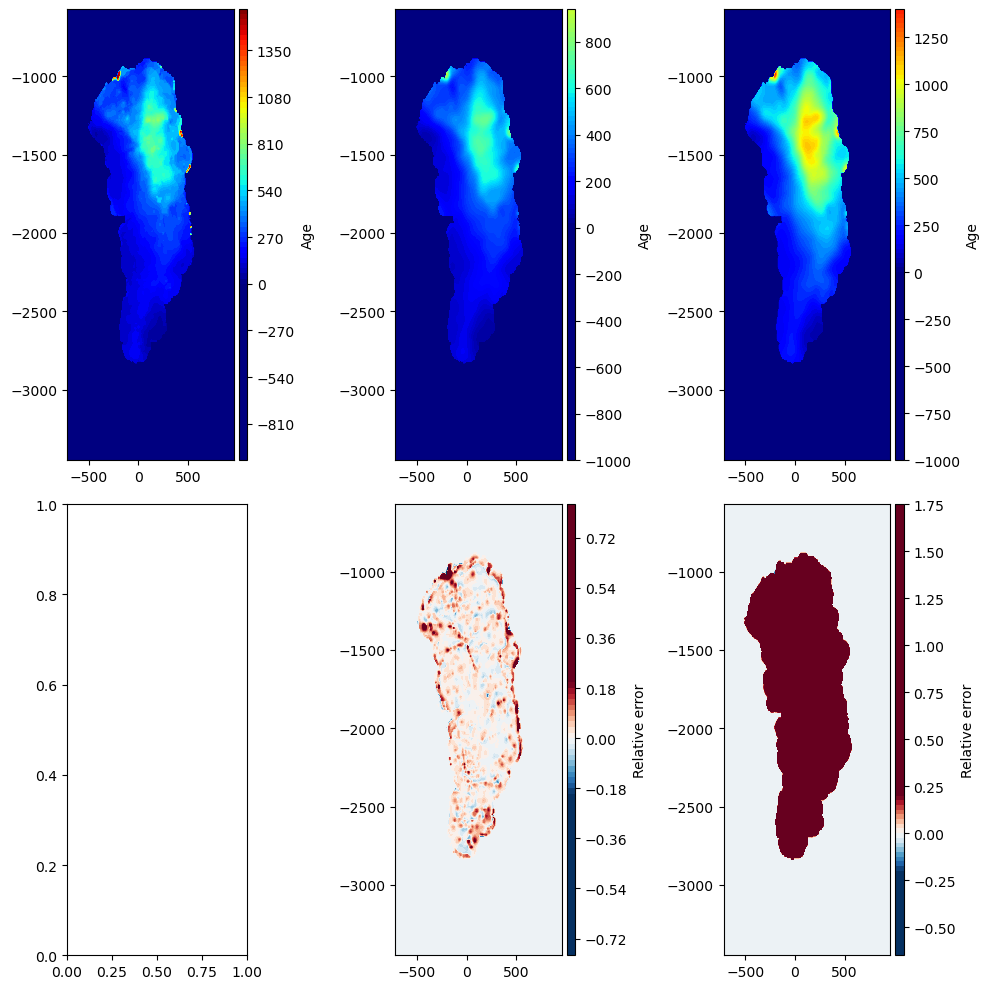

In [15]:
plt.rcParams["figure.figsize"] = (10,10)
fig, ax = plt.subplots(2,3)
idz = -2
fancyPlotter.plot_normal(ds_age_10kms['xModel'],
                         ds_age_10kms['yModel'], 
                         ds_age_10kms['age'][idz],
                         cmap = 'jet', nbins = 100, 
                         fig = fig, ax = ax[0,0], vmin = 0, vmax = np.max(ds_age_10kms['age'][idz]),
                         cbar_label = 'Age')

fancyPlotter.plot_normal(ds_age_10kms['xModel'],
                         ds_age_10kms['yModel'], 
                         ds_age_10kms['age_smooth2D'][idz],
                         cmap = 'jet', nbins = 100, 
                         fig = fig, ax = ax[0,1], vmin = 0, vmax = np.max(ds_age_10kms['age'][idz]),
                         cbar_label = 'Age')

fancyPlotter.plot_normal(ds_age_10kms['xModel'],
                         ds_age_10kms['yModel'], 
                         ds_age_10kms['age_smooth3D'][idz],
                         cmap = 'jet', nbins = 100, 
                         fig = fig, ax = ax[0,2], vmin = 0, vmax = np.max(ds_age_10kms['age'][idz]),
                         cbar_label = 'Age')

fancyPlotter.plot_normal(ds_age_10kms['xModel'],
                         ds_age_10kms['yModel'], 
                         ds_age_10kms['age_smooth2D'][idz]/ds_age_10kms['age'][idz]-1,
                         cmap = 'RdBu_r', nbins = 100, 
                         fig = fig, ax = ax[1,1], vmin = -0.2, vmax = 0.2,
                         cbar_label = 'Relative error')

fancyPlotter.plot_normal(ds_age_10kms['xModel'],
                         ds_age_10kms['yModel'], 
                         ds_age_10kms['age_smooth3D'][idz]/ds_age_10kms['age'][idz]-1,
                         cmap = 'RdBu_r', nbins = 100, 
                         fig = fig, ax = ax[1,2], vmin = -0.2, vmax = 0.2,
                         cbar_label = 'Relative error')
plt.tight_layout()

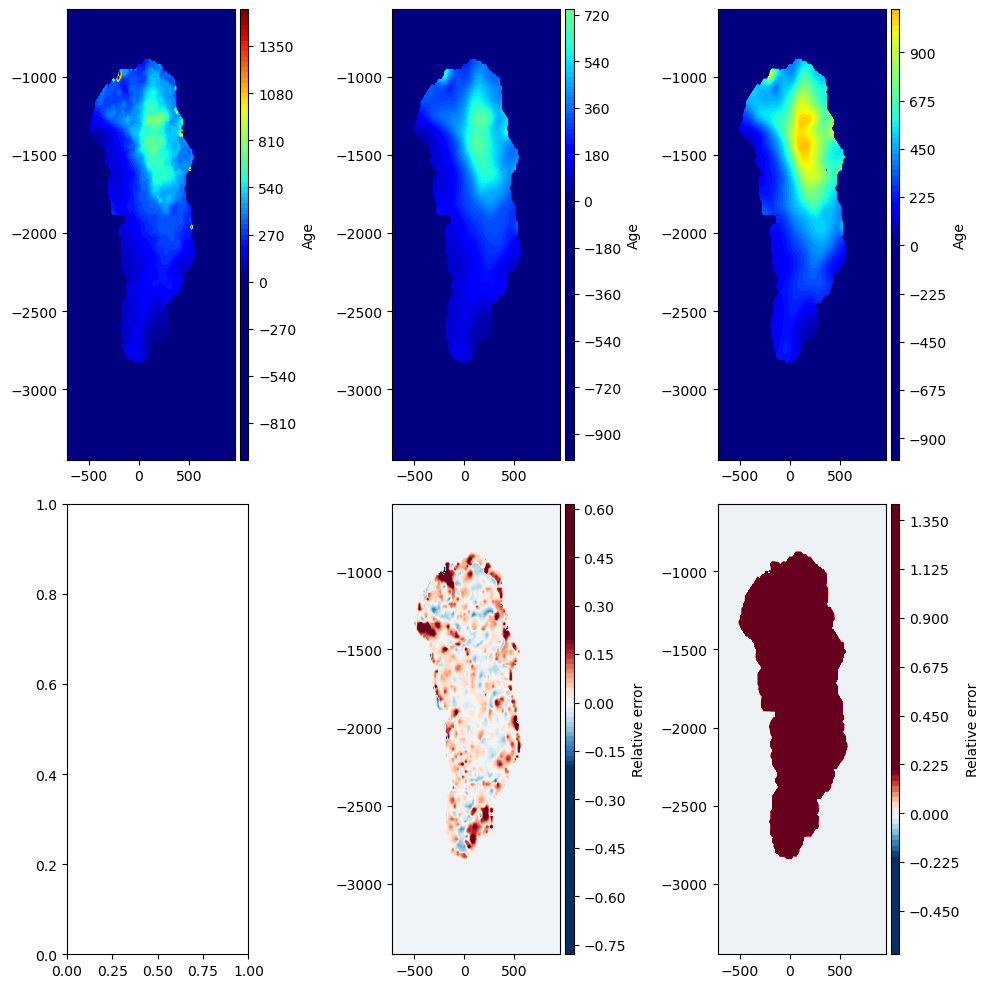

In [16]:
plt.rcParams["figure.figsize"] = (10,10)
fig, ax = plt.subplots(2,3)
idz = -2
fancyPlotter.plot_normal(ds_age_40kms['xModel'],
                         ds_age_40kms['yModel'], 
                         ds_age_40kms['age'][idz],
                         cmap = 'jet', nbins = 100, 
                         fig = fig, ax = ax[0,0], vmin = 0, vmax = np.max(ds_age_40kms['age'][idz]),
                         cbar_label = 'Age')

fancyPlotter.plot_normal(ds_age_40kms['xModel'],
                         ds_age_40kms['yModel'], 
                         ds_age_40kms['age_smooth2D'][idz],
                         cmap = 'jet', nbins = 100, 
                         fig = fig, ax = ax[0,1], vmin = 0, vmax = np.max(ds_age_40kms['age'][idz]),
                         cbar_label = 'Age')

fancyPlotter.plot_normal(ds_age_40kms['xModel'],
                         ds_age_40kms['yModel'], 
                         ds_age_40kms['age_smooth3D'][idz],
                         cmap = 'jet', nbins = 100, 
                         fig = fig, ax = ax[0,2], vmin = 0, vmax = np.max(ds_age_40kms['age'][idz]),
                         cbar_label = 'Age')

fancyPlotter.plot_normal(ds_age_40kms['xModel'],
                         ds_age_40kms['yModel'], 
                         ds_age_40kms['age_smooth2D'][idz]/ds_age_40kms['age'][idz]-1,
                         cmap = 'RdBu_r', nbins = 100, 
                         fig = fig, ax = ax[1,1], vmin = -0.2, vmax = 0.2,
                         cbar_label = 'Relative error')

fancyPlotter.plot_normal(ds_age_40kms['xModel'],
                         ds_age_40kms['yModel'], 
                         ds_age_40kms['age_smooth3D'][idz]/ds_age_40kms['age'][idz]-1,
                         cmap = 'RdBu_r', nbins = 100, 
                         fig = fig, ax = ax[1,2], vmin = -0.2, vmax = 0.2,
                         cbar_label = 'Relative error')
plt.tight_layout()

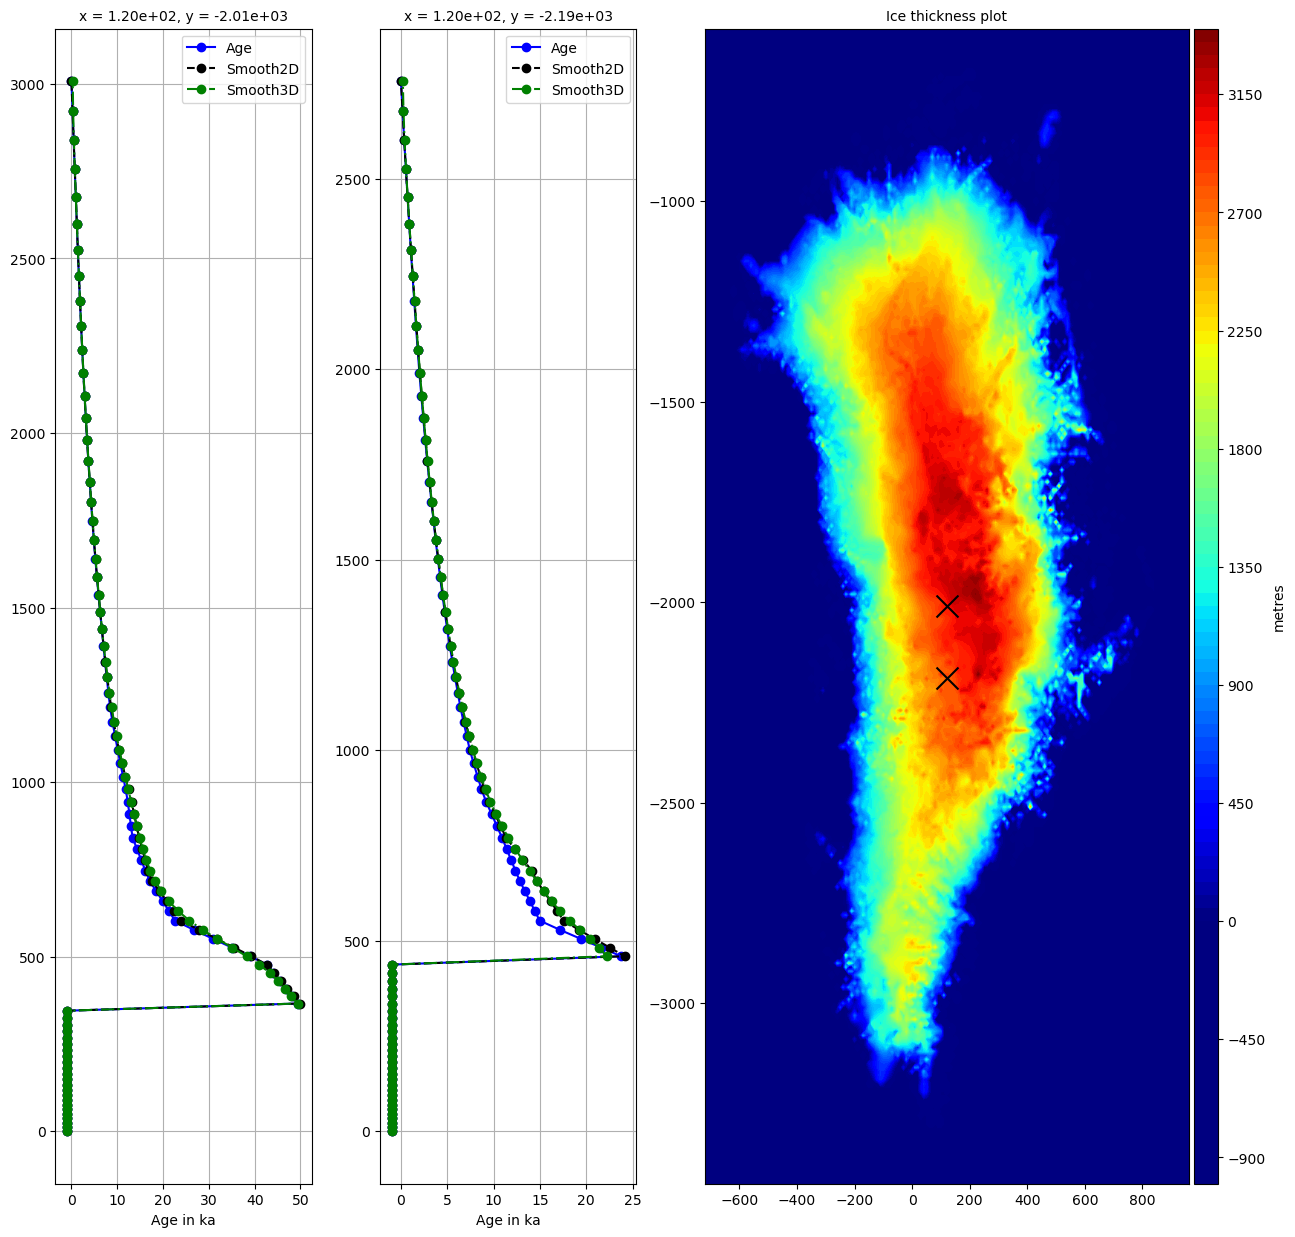

In [17]:
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots(1,3, width_ratios=[1,1,2])

fancyPlotter.plot_normal(ds_age_10kms['xModel'], ds_age_10kms['yModel'], 
                         ds_age_10kms['thick'],
                         cmap = 'jet', nbins = 100, vmin = 0,
                         fig = fig, ax = ax[2],
                         cbar_label = 'metres')
ax[2].set_title(f'Ice thickness plot', fontsize=10)

xIndex = int(ds_age_10kms['xModel'].shape[0]/2)
yIndex = int(ds_age_10kms['yModel'].shape[0]/2)

xLoc = ds_age_10kms['xModel'][xIndex].data
yLoc = ds_age_10kms['yModel'][yIndex].data
age_z = ds_age_10kms['age'][:,yIndex,xIndex]
age_smooth2D_z = ds_age_10kms['age_smooth2D'][:,yIndex,xIndex]
age_smooth3D_z = ds_age_10kms['age_smooth3D'][:,yIndex,xIndex]
depth_z = ds_age_10kms['z_minus_zbModel'][:,yIndex,xIndex]

fancyPlotter.plot_1D_depth_profile(age_z/1000, depth_z, None,
                                   fig=fig, ax = ax[0], 
                                   linestyle='-', marker='o', color='b',
                                   label = 'Age')
fancyPlotter.plot_1D_depth_profile(age_smooth2D_z/1000, depth_z, None,
                                   fig=fig, ax = ax[0], 
                                   linestyle='--', marker='o', color='k',
                                   label = 'Smooth2D')
fancyPlotter.plot_1D_depth_profile(age_smooth3D_z/1000, depth_z, None,
                                   fig=fig, ax = ax[0], 
                                   linestyle='-.', marker='o', color='g',
                                   label = 'Smooth3D')

ax[0].set_title(f'x = {xLoc:.2e}, y = {yLoc:.2e}', fontsize=10)
ax[0].set_xlabel(f'Age in ka', fontsize=10)
ax[2].scatter(xLoc, yLoc, s=250, c='black', marker='x')
ax[0].legend()

xIndex = int(ds_age_10kms['xModel'].shape[0]/2)
yIndex = int(3*ds_age_10kms['xModel'].shape[0]/4)

xLoc = ds_age_10kms['xModel'][xIndex].data
yLoc = ds_age_10kms['yModel'][yIndex].data
age_z = ds_age_10kms['age'][:,yIndex,xIndex]
age_smooth2D_z = ds_age_10kms['age_smooth2D'][:,yIndex,xIndex]
age_smooth3D_z = ds_age_10kms['age_smooth3D'][:,yIndex,xIndex]
depth_z = ds_age_10kms['z_minus_zbModel'][:,yIndex,xIndex]

fancyPlotter.plot_1D_depth_profile(age_z/1000, depth_z, None,
                                   fig=fig, ax = ax[1], 
                                   linestyle='-', marker='o', color='b',
                                   label = 'Age')
fancyPlotter.plot_1D_depth_profile(age_smooth2D_z/1000, depth_z, None,
                                   fig=fig, ax = ax[1], 
                                   linestyle='--', marker='o', color='k',
                                   label = 'Smooth2D')
fancyPlotter.plot_1D_depth_profile(age_smooth3D_z/1000, depth_z, None,
                                   fig=fig, ax = ax[1], 
                                   linestyle='-.', marker='o', color='g',
                                   label = 'Smooth3D')

ax[1].set_title(f'x = {xLoc:.2e}, y = {yLoc:.2e}', fontsize=10)
ax[1].set_xlabel(f'Age in ka', fontsize=10)
ax[2].scatter(xLoc, yLoc, s=250, c='black', marker='x')
ax[1].legend()

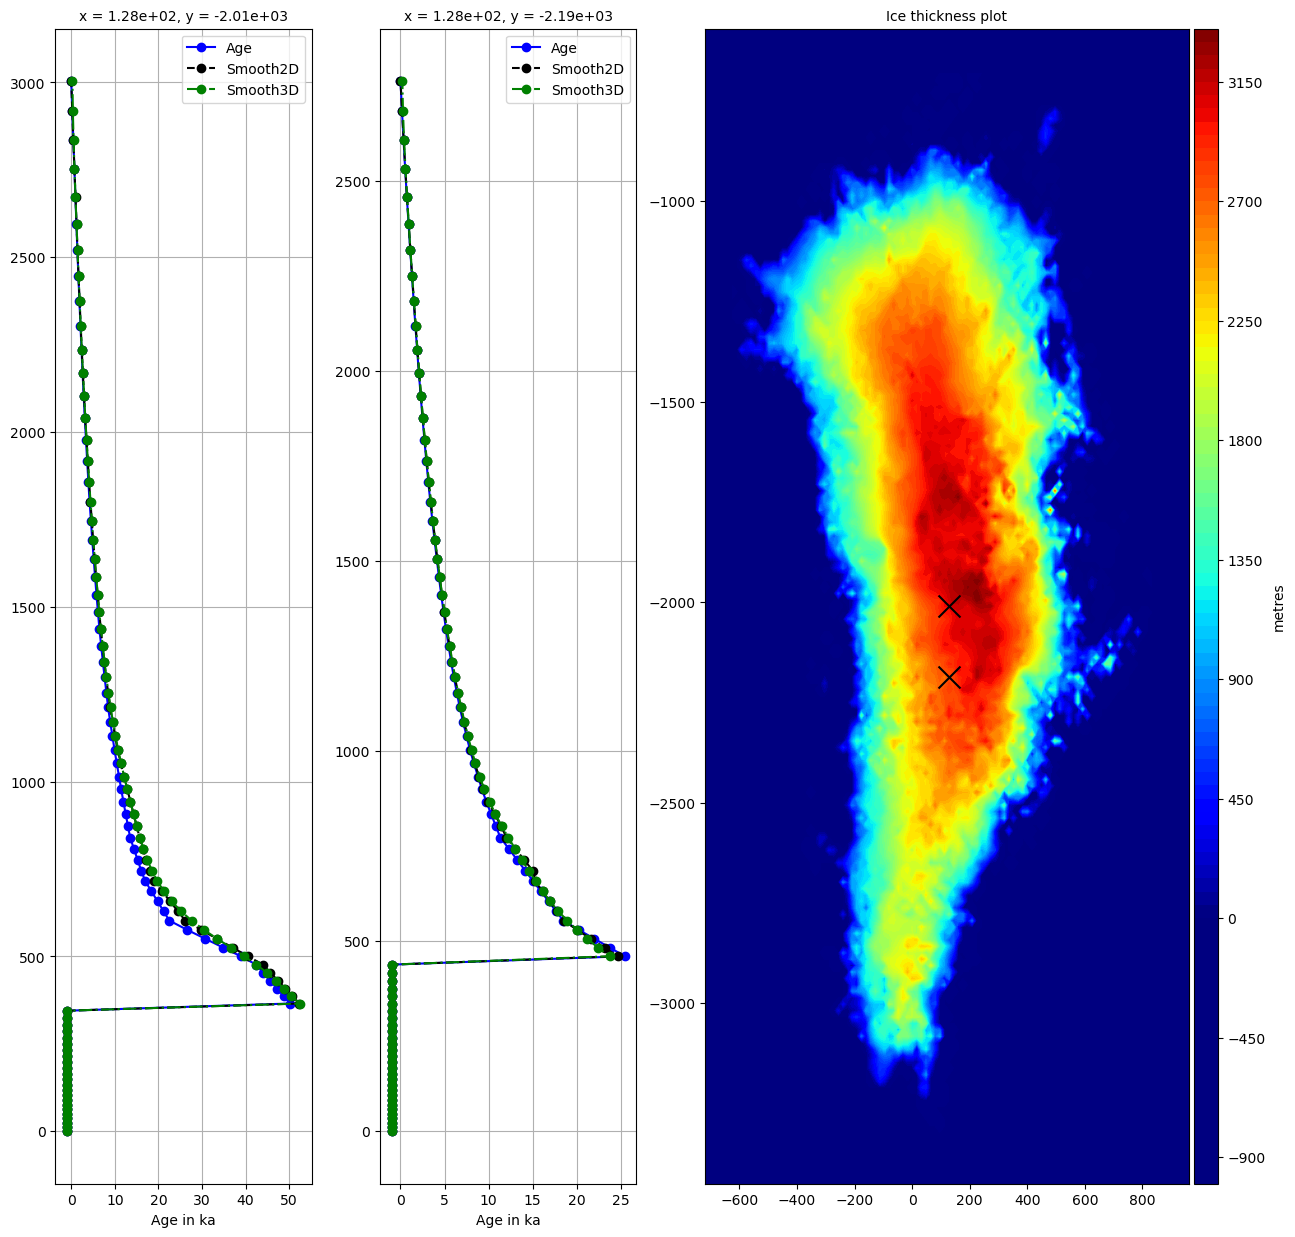

In [18]:
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots(1,3, width_ratios=[1,1,2])

fancyPlotter.plot_normal(ds_age_40kms['xModel'], ds_age_40kms['yModel'], 
                         ds_age_40kms['thick'],
                         cmap = 'jet', nbins = 100, vmin = 0,
                         fig = fig, ax = ax[2],
                         cbar_label = 'metres')
ax[2].set_title(f'Ice thickness plot', fontsize=10)

xIndex = int(ds_age_40kms['xModel'].shape[0]/2)
yIndex = int(ds_age_40kms['yModel'].shape[0]/2)

xLoc = ds_age_40kms['xModel'][xIndex].data
yLoc = ds_age_40kms['yModel'][yIndex].data
age_z = ds_age_40kms['age'][:,yIndex,xIndex]
age_smooth2D_z = ds_age_40kms['age_smooth2D'][:,yIndex,xIndex]
age_smooth3D_z = ds_age_40kms['age_smooth3D'][:,yIndex,xIndex]
depth_z = ds_age_40kms['z_minus_zbModel'][:,yIndex,xIndex]

fancyPlotter.plot_1D_depth_profile(age_z/1000, depth_z, None,
                                   fig=fig, ax = ax[0], 
                                   linestyle='-', marker='o', color='b',
                                   label = 'Age')
fancyPlotter.plot_1D_depth_profile(age_smooth2D_z/1000, depth_z, None,
                                   fig=fig, ax = ax[0], 
                                   linestyle='--', marker='o', color='k',
                                   label = 'Smooth2D')
fancyPlotter.plot_1D_depth_profile(age_smooth3D_z/1000, depth_z, None,
                                   fig=fig, ax = ax[0], 
                                   linestyle='-.', marker='o', color='g',
                                   label = 'Smooth3D')

ax[0].set_title(f'x = {xLoc:.2e}, y = {yLoc:.2e}', fontsize=10)
ax[0].set_xlabel(f'Age in ka', fontsize=10)
ax[2].scatter(xLoc, yLoc, s=250, c='black', marker='x')
ax[0].legend()

xIndex = int(ds_age_40kms['xModel'].shape[0]/2)
yIndex = int(3*ds_age_40kms['xModel'].shape[0]/4)

xLoc = ds_age_40kms['xModel'][xIndex].data
yLoc = ds_age_40kms['yModel'][yIndex].data
age_z = ds_age_40kms['age'][:,yIndex,xIndex]
age_smooth2D_z = ds_age_40kms['age_smooth2D'][:,yIndex,xIndex]
age_smooth3D_z = ds_age_40kms['age_smooth3D'][:,yIndex,xIndex]
depth_z = ds_age_40kms['z_minus_zbModel'][:,yIndex,xIndex]

fancyPlotter.plot_1D_depth_profile(age_z/1000, depth_z, None,
                                   fig=fig, ax = ax[1], 
                                   linestyle='-', marker='o', color='b',
                                   label = 'Age')
fancyPlotter.plot_1D_depth_profile(age_smooth2D_z/1000, depth_z, None,
                                   fig=fig, ax = ax[1], 
                                   linestyle='--', marker='o', color='k',
                                   label = 'Smooth2D')
fancyPlotter.plot_1D_depth_profile(age_smooth3D_z/1000, depth_z, None,
                                   fig=fig, ax = ax[1], 
                                   linestyle='-.', marker='o', color='g',
                                   label = 'Smooth3D')

ax[1].set_title(f'x = {xLoc:.2e}, y = {yLoc:.2e}', fontsize=10)
ax[1].set_xlabel(f'Age in ka', fontsize=10)
ax[2].scatter(xLoc, yLoc, s=250, c='black', marker='x')
ax[1].legend()

In [19]:
ds_age_40kms

<xarray.Dataset> Size: 50MB
Dimensions:           (jModel: 181, iModel: 106, yModel: 181, xModel: 106,
                       sigma_levelModel: 81)
Coordinates:
    z_minus_zbModel   (sigma_levelModel, yModel, xModel) float64 12MB nan ......
  * xModel            (xModel) float64 848B -720.0 -704.0 -688.0 ... 944.0 960.0
  * yModel            (yModel) float64 1kB -3.45e+03 -3.434e+03 ... -570.0
  * jModel            (jModel) int64 1kB 0 1 2 3 4 5 ... 175 176 177 178 179 180
  * iModel            (iModel) int64 848B 0 1 2 3 4 5 ... 101 102 103 104 105
  * sigma_levelModel  (sigma_levelModel) float64 648B 0.0 0.003962 ... 1.0
Data variables:
    xMesh             (jModel, iModel) float64 153kB -720.0 -704.0 ... 960.0
    yMesh             (jModel, iModel) float64 153kB -3.45e+03 ... -570.0
    thick             (yModel, xModel) float64 153kB -999.0 -999.0 ... -999.0
    age               (sigma_levelModel, yModel, xModel) float64 12MB -999.0 ...
    age_smooth2D      (sigma_levelModel, yModel, xModel) float64 12MB -999.0 ...
    age_smooth3D      (sigma_levelModel, yModel, xModel) float64 12MB -999.0 ...